## ASSIGNMENT 2
# PHÂN TÍCH DỮ LIỆU TMDB MOVIE
## Dựa vào dataset để phân tích và trả lời 3 câu hỏi sau:
   ### 1. Khu vực nào có ảnh hưởng nhất tới doanh thu?
   ### 2. Thể loại phim ảnh hưởng đến doanh thu và điểm trung bình như thế nào?
   ### 3. Ngày phát hành ảnh hưởng như thế nào đến doanh thu?

In [70]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway


### Xử lí dữ liệu đầu vào

In [71]:

def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries',
                    'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

df = load_tmdb_movies("C:/Users/Admin/Desktop/1CBDRobotic/res/week2/tmdb_5000_movies.csv/5000_movies.csv")

### Insight của dataset

In [72]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [73]:
print(df.shape)

(4803, 20)


In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Ta thấy dữ liệu không bị null nhiều, homepage là column có nhiều giá trị null nhất

In [75]:
print(df.describe())

             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max      

Nhận xét về các thông số cơ bản của dataset, ta thấy có khá nhiều giá trị 0 trong dataset, đặc biệt là revenue và budget. Như vậy ta cần phải có giải pháp xử lí các giá trị 0 này, tránh để ảnh hưởng tới mô hình phân tích.

## 1. Khu vực nào có ảnh hưởng nhất tới doanh thu?
### Đầu tiên, ta cần phải kiểm định xem liệu khu vực có thực sự ảnh hưởng tới doanh thu hay không?

### Tìm tất cả các countries trong data

In [76]:
countries = []
for value in df['production_countries']:
    for i in value:
        if i['iso_3166_1'] not in countries:
            countries.append(i['iso_3166_1'])
print("countries:", countries)

countries: ['US', 'GB', 'JM', 'BS', 'DM', 'CZ', 'PL', 'SI', 'NZ', 'DE', 'CN', 'CA', 'IT', 'JP', 'MT', 'AU', 'FR', 'BE', 'IN', 'NL', 'ES', 'AE', 'HK', 'TW', 'IE', 'MA', 'HU', 'SG', 'NO', 'SE', 'ZA', 'RU', 'RO', 'MX', 'MC', 'CH', 'PK', 'MY', 'FI', 'IS', 'DK', 'TN', 'PH', 'BG', 'KR', 'BR', 'PE', 'LU', 'BA', 'KZ', 'PT', 'AW', 'LY', 'RS', 'UA', 'CL', 'AR', 'PA', 'AT', 'GR', 'LT', 'KH', 'TH', 'SK', 'IL', 'FJ', 'CS', 'TR', 'NG', 'CY', 'JO', 'BO', 'EC', 'CO', 'EG', 'BT', 'LB', 'KG', 'DZ', 'ID', 'GY', 'IR', 'GP', 'AF', 'AO', 'DO', 'CM', 'KE']


### Tìm tất cả các index của countries, mà ở đó revenue != 0, giới hạn 20 index

In [77]:
nums = []
index = []
nums_actual = []
for i in countries:
    list_index_actual = list()
    list_index = list()
    idx = 0
    for item in df['production_countries']:
        try:
            item = str(item)
        except:
            print("")
        if i in item:
            if df.iloc[idx]['revenue'] != 0:
                list_index_actual.append(idx)
                if len(list_index) <= 19:
                    list_index.append(idx)
        idx = idx + 1

    index.append(list_index)
    nums.append(len(list_index))
    nums_actual.append(len(list_index_actual))

print(nums_actual)


[3011, 459, 2, 3, 1, 16, 4, 1, 22, 239, 39, 170, 48, 41, 4, 82, 207, 14, 31, 14, 49, 13, 29, 4, 27, 3, 8, 1, 9, 8, 10, 12, 7, 19, 1, 13, 2, 0, 3, 5, 10, 1, 1, 3, 9, 6, 2, 7, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 5, 3, 1, 0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]


### Để phục vụ cho mục đích kiểm định bằng Anova test, ta chỉ lấy những quốc gia có số bộ phim = 20, những quốc gia có số bộ phim ít hơn 20 sẽ không dùng để kiểm định Anova.

In [78]:
countries2 = []
index2 = []
nums_actual2 =[]
for i in range(len(nums)):
    if nums[i] == 20:
        countries2.append(countries[i])
        index2.append(index[i])
        nums_actual2.append(nums_actual[i])

print(nums_actual2)
print(countries2)

countries2_copy = list(countries2)



[3011, 459, 22, 239, 39, 170, 48, 41, 82, 207, 31, 49, 29, 27]
['US', 'GB', 'NZ', 'DE', 'CN', 'CA', 'IT', 'JP', 'AU', 'FR', 'IN', 'ES', 'HK', 'IE']


### Lấy ra revenue của các quốc gia có số bộ phim = 20
### Vẽ biểu đồ boxplot

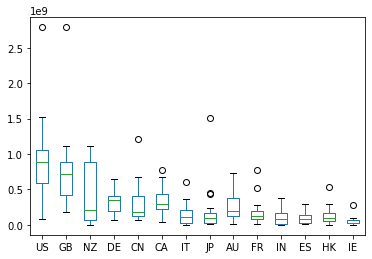

<Figure size 1296x432 with 0 Axes>

In [79]:
get_value = {}
for i in range(len(countries2)):
    a = df.iloc[index2[i]]['revenue'].array
    get_value[countries2[i]] = a
    countries2[i] = a

obj = pd.DataFrame(get_value)

#print(obj)

obj.plot(kind='box')
plt.figure(figsize=(18,6))
plt.show()


### Ta giả sử mỗi quốc gia lấy ra 20 bộ phim bất kì, kiểm định Anova để tìm ra xem liệu revenue có ảnh hưởng bởi các quốc gia khác nhau hay không

### h0: khu vực không ảnh hưởng đến doanh thu
### h1: khu vực có ảnh hưởng đến doanh thu

In [80]:
anova_test = f_oneway(countries2[0],countries2[1],countries2[3],countries2[4],countries2[5],countries2[6]
                      ,countries2[7],countries2[8],countries2[9],countries2[10],countries2[11],countries2[12]
                      ,countries2[13])
print(anova_test)

F_onewayResult(statistic=17.133459954687474, pvalue=1.80336892146178e-26)


### => Ta thấy pvalue < 0.05, do đó có thể phủ định H0 và chấp nhận giả thuyết H1: khu vực có ảnh hưởng đến doanh thu

### Ta thấy khu vực ảnh hưởng nhất tới doanh thu sẽ là khu vực có số lượng bộ phim nhiều nhất

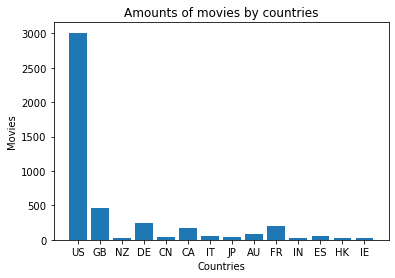

In [81]:
plt.bar(countries2_copy, nums_actual2)
plt.xlabel('Countries')
plt.ylabel('Movies')
plt.title('Amounts of movies by countries')
plt.show()

### => Ta thấy US có số lượng bộ phim vượt trội so với các quốc gia khác, có thể dễ dàng kết luận US là nước có ảnh hưởng nhất tới revenue của phim.

## 2. Thể loại phim ảnh hưởng đến doanh thu và điểm trung bình như thế nào?
### Kiểm định xem thể loại phim có ảnh hưởng đến doanh thu và điểm trung bình hay không

### Tìm tất cả các thể loại phim trong dataset

In [82]:
genres = []
for value in df['genres']:
    for i in value:
        if i['name'] not in genres:
            genres.append(i['name'])
            
print("genres:",genres)

genres: ['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']


### Tìm tất cả các index của genres, mà ở đó revenue != 0, giới hạn 100 index

In [83]:
nums = []
index = []

for i in genres:
    list_index = list()
    idx = 0
    for item in df['genres']:
        try:
            item = str(item)
        except:
            print("")
        if i in item:
            if df.iloc[idx]['revenue'] != 0:
                 if len(list_index) <= 99:
                    list_index.append(idx)
        idx = idx + 1

    index.append(list_index)
    nums.append(len(list_index))


### Để phục vụ cho mục đích kiểm định bằng Anova test, ta chỉ lấy những thể loại có số bộ phim = 100, những quốc gia có số bộ phim ít hơn 100 sẽ không dùng để kiểm định Anova.

In [84]:
index2 = []
genres2 = []
for i in range(len(nums)):
    if nums[i] == 100:
        index2.append(index[i])
        genres2.append(genres[i])

# print(index_genres_avenue)
# print(genres_avenue)



### Lấy ra revenue của các thể loại có số bộ phim = 100
### Vẽ biểu đồ boxplot

In [85]:
get_value2 = {}
genres_score = list(genres2)

for i in range(len(genres2)):
    temp_revenue = df.iloc[index2[i]]['revenue'].array
    temp_score = df.iloc[index2[i]]['vote_average'].array
    get_value2[genres2[i]] = temp_revenue
    genres2[i] = temp_revenue
    genres_score[i] = temp_score

obj2 = pd.DataFrame(get_value2)

# print(obj)


### Ta giả sử mỗi thể loại lấy ra 100 bộ phim bất kì, kiểm định Anova để tìm ra xem liệu revenue và score có ảnh hưởng bởi các thể loại khác nhau hay không

### h0: thể loại không ảnh hưởng đến revenue và score
### h1: thể loại có ảnh hưởng đến revenue và score

In [86]:

genres_and_avenue = f_oneway(genres2[0],genres2[1],genres2[2],genres2[3],genres2[4],genres2[5],genres2[6],genres2[7],
                      genres2[8],genres2[9],genres2[10],genres2[11],genres2[12],genres2[13],genres2[14],genres2[15])

genres_and_score = f_oneway(genres_score[0],genres_score[1],genres_score[2],genres_score[3],genres_score[4],genres_score[5],genres_score[6],genres_score[7],
                      genres_score[8],genres_score[9],genres_score[10],genres_score[11],genres_score[12],genres_score[13],genres_score[14],genres_score[15])

print(genres_and_avenue)
print(genres_and_score)

F_onewayResult(statistic=50.291340308889595, pvalue=2.652138939960255e-122)
F_onewayResult(statistic=8.897106671974027, pvalue=3.900561888405041e-20)


### => Cả pvalue của genres_and_avenue và pvalue của genres_and_score đều < 0.05
### => ta có thể phủ định H0 và chấp nhận giả thuyết H1: thể loại phim có ảnh hưởng đến doanh thu và điểm trung bình

## 3. Ngày phát hành ảnh hưởng như thế nào đến doanh thu?
### Kiểm định xem ngày phát hành có ảnh hưởng đến doanh thu hay không

### Đầu tiên, ta thấy 1 bộ phim sẽ có thể bị ảnh hưởng bởi giá trị years và months trong date, do đó việc của ta là sẽ kiểm định 2 phần, đầu tiên sẽ kiểm định xem liệu năm phát hành có ảnh hưởng tới revenue hay không, sau đó sẽ kiểm định liệu tháng phát hành có ảnh hưởng hay không
### Từ đó sẽ kết luận được liệu ngày phát hành có ảnh hưởng đến doanh thu không


## a. Kiểm định với years
### lấy ra 20 năm gần nhất

In [87]:
years = list()

for value in df['release_date']:
    if value.year not in years:
        years.append(value.year)

years.sort(reverse=True)
del years[20:len(years)]

print("years:",years)


years: [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998]


### lấy ra các năm có 50 bộ phim

In [88]:
nums = []
index = []

for i in years :
    list_index = list()
    idx = 0
    for item in df['release_date']:
        if i == item.year:
            if df.iloc[idx]['revenue'] != 0:
                if len(list_index) <= 49:
                    list_index.append(idx)
        idx = idx + 1

    index.append(list_index)
    nums.append(len(list_index))


### tính toán và kiểm định Anova dựa trên 50 bộ phim của mỗi năm
### H0: năm không ảnh hưởng tới doanh thu
### H1: năm có ảnh hưởng đến doanh thu

In [89]:
index2 = []
years2 = []
for i in range(len(nums)):
    if nums[i] == 50:
        index2.append(index[i])
        years2.append(years[i])

get_value3 = {}

for i in range(len(years2)):
    temp_revenue = df.iloc[index2[i]]['revenue'].array
    get_value3[years2[i]] = temp_revenue
    years2[i] = temp_revenue

obj3 = pd.DataFrame(get_value3)

years_and_avenue = f_oneway(years2[0],years2[1],years2[2],years2[3],years2[4],years2[5],years2[6],years2[7],years2[8],
                            years2[9],years2[10],years2[11],years2[12],years2[13],years2[14],years2[15],years2[16],
                            years2[17],years2[18])

print(years_and_avenue)

F_onewayResult(statistic=4.149885656486562, pvalue=1.7221399045956696e-08)


### => Ta thấy giá trị pvalue < 0.05, ta chấp nhận H1

## b. Kiểm định với months

### Lấy ra các tháng có 200 bộ phim

In [90]:
months = np.arange(1,13)

print("month:", months)

nums = []
index = []

for i in months :
    list_index = list()
    # a = list()
    idx = 0
    for item in df['release_date']:
        if i == item.month:
            if df.iloc[idx]['revenue'] != 0:
                # a.append(idx)
                if len(list_index) <= 199:
                    list_index.append(idx)
        idx = idx + 1

    index.append(list_index)
    nums.append(len(list_index))


month: [ 1  2  3  4  5  6  7  8  9 10 11 12]


### tính toán và kiểm định Anova dựa trên 200 bộ phim của mỗi tháng
### H0: tháng không ảnh hưởng tới doanh thu
### H1: tháng có ảnh hưởng đến doanh thu

In [91]:
index2 = []
months2 = []
for i in range(len(nums)):
    if nums[i] == 200:
        index2.append(index[i])
        months2.append(months[i])


get_value4 = {}

for i in range(len(months2)):
    temp_revenue = df.iloc[index2[i]]['revenue'].array
    get_value4[months2[i]] = temp_revenue
    months2[i] = temp_revenue

obj4 = pd.DataFrame(get_value4)
#print(obj4)
#print(get_value4)

months_and_avenue = f_oneway(months2[0],months2[1],months2[2],months2[3],months2[4],months2[5],months2[6],months2[7],months2[8],
                            months2[9],months2[10],years2[11])

print(months_and_avenue)

F_onewayResult(statistic=25.39556732646321, pvalue=3.635052379321253e-50)


### => Ta thấy giá trị pvalue < 0.05, ta chấp nhận H1¶
### => cả months và years đều ảnh hưởng tới doanh thu, vậy ta kết luận rằng ngày phát hành có ảnh hưởng đến doanh thu